### Load datasets


#### Dataset des tweets

In [1]:
import pandas as pd
df = pd.read_csv('D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\tweets_v5.csv') 
pd.set_option('display.max_colwidth', None)

In [2]:
df.head()

,id,data,label
0,1,Nous aurons à être solidaires et accueillants de celles et ceux qui fuient aujourd’hui leur pays en guerre.,aide sociale
1,2,"🇺🇦 Solidarité avec l’Ukraine, solidarité avec le peuple ukrainien. https://t.co/r1l8bVoHHd",aide sociale
2,3,Je serai place de la République à Paris ce soir à 18h en soutien au peuple ukrainien. J’appelle tous les citoyens Français qui ont la paix au cœur à se mobiliser. La voix de notre peuple compte.,liberte
3,4,La responsabilité de la France est de tout faire pour que cesse la guerre aux portes de l’Europe. L’impuissance ne peut servir de réponse à la violation du droit international.,international
4,5,"Ce matin devant l’ambassade de Russie j’ai vu la tristesse, la dignité et la mobilisation des jeunes Ukrainiens de France. Je leur apporte mon soutien.",NaN


In [ ]:
df.groupby('label').size()

### Mise en place du text preprocessing 

In [3]:
import unidecode
import re
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop #Spacy stopwords
from spacy.lang.fr.stop_words import STOP_WORDS as en_stop
import test

In [4]:
fr_stop.add("ans")
fr_stop.add("ca")
fr_stop.add("etre")

In [3]:
def remove_emoji():
  regrex_pattern = re.compile(pattern = "["    #Pattern pour enlever les emojis
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                            "]+", flags = re.UNICODE)
  return regrex_pattern
 
def remove_accents(text):
  return unidecode.unidecode(text)

def remove_stopwords(text):
  list_stopwords = list(fr_stop) + list(en_stop)
  stopwords = " ".join([word for word in str(text).split() if word not in list_stopwords]) #Spacy stopwords
  return stopwords
    
def remove_words(text):
  liste_terme = ["ve","n","s","d","l","j","y","c","e","m","h","quelqu","cht","lr","oas","qu","ll","yu","an","g","TRUE","jadot","avectaubira","zemmourcroissance","zemmourlille","cdanslair","taubirasorbonne","emmanuel","bfmpolitique","aujourd","macron"]
  return " ".join([word for word in str(text).split() if word not in liste_terme])

def final_preprocess(text): 
    text = text.lower()  #Mettre tout les mots en minuscule 
    text = re.sub(r'{link}', '',text) #Remove links 
    text = re.sub(r"\[video\]", '',text) #Remove videos
    text = re.sub(r'&[a-z]+;', '',text) #Remove HTML references
    text = re.sub(r'@mention', '',text) #Remove Twitters handles @
    text = re.sub(r'\d+', '', text) #Remove numbers 
    text = re.sub(r'http\S+', '',text) #Remove HTML
    text = re.sub(r'www\S+', '',text) #Remove HTML
    text = re.sub(r'[^\w\s]+',' ',text) #Remove ponctuation et apostrophes
    text = re.sub(remove_emoji(),'',text)  #Remove les emojis
    text = test.lematize(text) #Lemmatization
    text = remove_accents(text) #Remove accents
    text = remove_stopwords(text) #Remove stopwords
    text = remove_words(text) #Remove custom words 
    return text 

### Choix de suppression / modification par thématique


In [ ]:
#df.drop(df.index[(df["label"] == "juridique")],inplace=True)
#df.drop(df.index[(df["label"] == "justice")],inplace=True)
df.drop(df.index[(df["label"] == "numerique")],inplace=True)

#Modification des nouvelles labels
df['label'] = df['label'].replace(['justice','juridique'],'droit politique')
df['label'] = df['label'].replace(['droit politique','liberte'],'democratie')
df['label'] = df['label'].replace('aide sociale','aide_sociale')
df['label'] = df['label'].replace('pouvoir achat','pouvoir_achat')

In [187]:
df.dropna(subset = ["label"], inplace=True) #Delete des lignes contenant des cases vides 
df.drop(df.index[(df["label"] == "autre")],inplace=True)
df.drop(df.index[(df["label"] == "delete")],inplace=True)
df.drop(df.index[(df["label"] == "autre#delete")],inplace=True)

#### Implémentation du text processing

In [8]:
%%time
#Cas pour la compilation avec Cython

df['data_clean'] = df['data'].apply(lambda text: final_preprocess(text))

CPU times: total: 19min 15s
Wall time: 20min 13s


#### Export des tweets nettoyés sur un nouveau CSV 

In [9]:
df.to_csv("D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\tweets_clean.csv")

### Load new dataset pour les tweets nettoyées

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\tweets_clean.csv') 
df[["label","data","data_clean"]].head()

,label,data,data_clean
0,aide_sociale,Nous aurons à être solidaires et accueillants de celles et ceux qui fuient aujourd’hui leur pays en guerre.,solidaire accueillant fuir pays guerre
1,aide_sociale,"🇺🇦 Solidarité avec l’Ukraine, solidarité avec le peuple ukrainien. https://t.co/r1l8bVoHHd",solidarite ukraine solidarite peupler ukrainien
2,democratie,Je serai place de la République à Paris ce soir à 18h en soutien au peuple ukrainien. J’appelle tous les citoyens Français qui ont la paix au cœur à se mobiliser. La voix de notre peuple compte.,placer republique paris soir soutien peupler ukrainien appeler citoyen francais paix coeur mobiliser voix peupler compter
3,international,La responsabilité de la France est de tout faire pour que cesse la guerre aux portes de l’Europe. L’impuissance ne peut servir de réponse à la violation du droit international.,responsabilite france faire cesser guerre porter europe impuissance pouvoir servir reponse violation droit international
4,international,#UkraineRussie | Le droit international est violé. L’impuissance ne peut servir de réponse. https://t.co/NXVd1s84Nb,ukrainerussie droit international violer impuissance pouvoir servir reponse


In [7]:
df.groupby('label').size()

label
aide_sociale     283
culture          368
democratie       521
ecologie         425
education        248
emploi           381
immigration      156
international    417
pouvoir_achat    359
sante            206
securite         374
dtype: int64

### Data pre-processing

In [2]:
from io import StringIO

col = ['label', 'data_clean']
df = df[col]
df = df[pd.notna(df['label'])]

df.columns = ['label', 'data_clean']
df['label_id'] = df['label'].factorize()[0] #Encoder tout les labels en numérique
label_id_df = df[['label','label_id']].drop_duplicates().sort_values('label_id')

#Dictionnaires pour le futur
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id','label']].values) 

df.head()

,label,data_clean,label_id
0,aide_sociale,solidaire accueillant fuir pays guerre,0
1,aide_sociale,solidarite ukraine solidarite peupler ukrainien,0
2,democratie,placer republique paris soir soutien peupler ukrainien appeler citoyen francais paix coeur mobiliser voix peupler compter,1
3,international,responsabilite france faire cesser guerre porter europe impuissance pouvoir servir reponse violation droit international,2
4,international,ukrainerussie droit international violer impuissance pouvoir servir reponse,2


### Analyse des mots récurrentes par thématique

In [33]:
def select_label(name):
  new_df = df[df["label"].str.contains(name)]
  return new_df

In [34]:
#Thématiques: aide sociale,culture,ecologie,education,emploi,immigration,international,droit politique,liberte,pouvoir achat, sante, securite
thematique = "democratie"
df3 = select_label(thematique)

In [35]:
df3[['label',"data_clean"]].head()

,label,data_clean
2,democratie,placer republique pari soir soutien peupler ukrainien appeler citoyen francais paix coeur mobiliser voix peupler compter
6,democratie,mois fin mandat engager nucleaire programmer rester passif accommoder vouloir vivre sujet non
11,democratie,generation penser monde agir revenu emancipation autonomie universel egal
13,democratie,justice epine dorsale democratie falloir rehabiliter mission miser mal quinquennat nicolassarkozy augmenter promotion magistrat record historique quinquennat beneficier
14,democratie,croire personnalite providentiel faiblesse supplementaire croire maturite peupler fr falloir personnalite courage rompre obsession incarnation consentir faire respirer democratie


In [36]:
from collections import Counter

def word_reccurence(int):
  cnt = Counter()
  for text in df3["data_clean"].values:
      for word in text.split():
          cnt[word] += 1
  return cnt.most_common(int) #Selection les mots les plus récurrents

In [37]:
print(word_reccurence(50))

[('justice', 95), ('droit', 88), ('liberte', 83), ('francais', 76), ('vouloir', 76), ('pouvoir', 75), ('contrer', 72), ('france', 70), ('falloir', 57), ('femme', 56), ('faire', 55), ('violence', 49), ('politique', 45), ('loi', 45), ('republique', 38), ('democratie', 36), ('mettre', 36), ('social', 34), ('pays', 33), ('president', 32), ('public', 30), ('etat', 30), ('porter', 30), ('devoir', 29), ('egalite', 29), ('pecresse', 29), ('gouvernement', 28), ('grand', 28), ('peupler', 27), ('fin', 27), ('vie', 26), ('lutter', 25), ('mourir', 25), ('societe', 23), ('europe', 23), ('victime', 23), ('vivre', 22), ('donner', 21), ('changer', 21), ('europeen', 21), ('travail', 21), ('devon', 20), ('temps', 20), ('interdire', 20), ('defendre', 20), ('bien', 19), ('homme', 19), ('moyen', 19), ('non', 18), ('battre', 18)]


### Visualisation le nombre de tweets  des thématiques

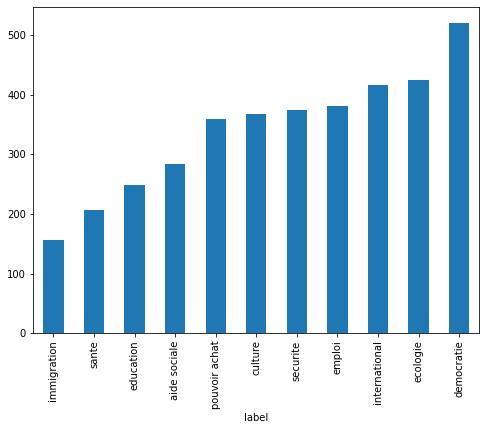

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').data_clean.count().sort_values().plot.bar(ylim=0)
plt.show()

## Evaluation des modèles 

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


### Evaluation par fit_transform

In [4]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df.data_clean).toarray() #Transformation les données de textes en vecteurs
labels = df.label_id

In [ ]:
names = vectorizer.get_feature_names()
names

In [17]:
features.shape 

(3738, 8444)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.20,random_state = 0)

model = LinearSVC()
#model = LogisticRegression() 
#model = RandomForestClassifier(n_estimators=400, random_state=0)   
model.fit(X_train, y_train) #Entrainement des données
y_pred = model.predict(X_test)

#Score
score = model.score(X_test,y_test)
print("Score :",score)

Score : 0.643048128342246


In [ ]:
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 
print(accuracy_score(y_test,y_pred))

##### Sauvegarder la version Sk learn du modèle zn joblib

In [18]:
import sklearn 
print(sklearn.__version__)

1.0.2


In [12]:
from joblib import dump, load
dump(model, 'D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\classification_0.27_1.0.2.joblib')

['D:\\\\Data\\\\Work\\\\Stage_Cergy\\\\Tests_modèles\\Sk_learn\\files\\classification_0.27_1.0.2.joblib']

#### Import le modèle sauvegardé en joblib

In [13]:
new_model = load('D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\classification_0.27_1.0.2.joblib')

### Dictionnaire des thématiques prédictes

In [3]:
col = ['label', 'data_clean']
df4 = df[col]
df = df[pd.notna(df['label'])]
df4.columns = ['label', 'data_clean']

X_train, X_test, y_train, y_test = train_test_split(df4['data_clean'], df4['label'], random_state = 0)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
model = LinearSVC().fit(X_train_tfidf, y_train)

In [18]:
print(X_train_counts.shape)

(2803, 7347)


In [19]:
print(X_train_tfidf.shape)

(2803, 7347)


In [9]:
import pickle

# Save the vectorizer
vec_file = 'D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

# Save the model
mod_file = 'D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\classification.model.joblib'
pickle.dump(model, open(mod_file, 'wb'))

##### Sauvegarder la version Sk learn du modèle en ONNX

In [10]:
from skl2onnx.common.data_types import Int64TensorType
from skl2onnx import convert_sklearn

model_onnx = convert_sklearn(
    model, "tfidf",
    initial_types=[("Float64_input", Int64TensorType([None, 2]))])

with open("D:\\Data\\Work\\Stage_Cergy\\Tests_modèles\\Sk_learn\\files\\classification.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

#### Import le modèle sauvegardé en ONNX

In [ ]:
import onnxruntime as rt

sess = rt.InferenceSession("D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\classification.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred_onx = sess.run([label_name], {input_name: vec_file.transform(["prix d'essence"])})
print(pred_onx)

In [25]:
def classify_utterance(utt):
    # load the vectorizer
    loaded_vectorizer = pickle.load(open('D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\vectorizer.pickle', 'rb'))
    # load the model
    loaded_model = pickle.load(open('D:\\\Data\\\Work\\\Stage_Cergy\\\Tests_modèles\\Sk_learn\\files\\classification.model.joblib', 'rb'))
    # make a prediction
    print(loaded_model.predict(loaded_vectorizer.transform([utt])))

In [26]:
classify_utterance("solidaire accueillant fuir pays guerre")

['aide_sociale']


### Evaluation des modèles avec cross_val_score

In [253]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2, random_state=0) #Entrainement 80% Test 20%

models = [
    RandomForestClassifier(n_estimators=400, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
]
CV =  5 #Nombre de splits dans le crossValidation 
cv_df = pd.DataFrame(index=range(CV * len(models))) #Creation d'un dataframe sur les différents modèles de crossValidation 
val_score = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    val_score.append((model_name, fold_idx, accuracy)) #Liste de validation  
cv_df = pd.DataFrame(val_score, columns=['model_name', 'fold_idx', 'accuracy'])

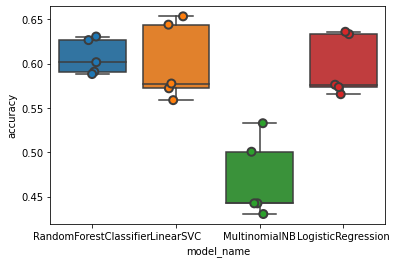

In [260]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [254]:
cv_df.groupby('model_name').accuracy.mean().sort_values()

model_name
MultinomialNB             0.469795
LogisticRegression        0.596863
LinearSVC                 0.601149
RandomForestClassifier    0.607555
Name: accuracy, dtype: float64